# Evaluation Project - 3 (Doctor's Consultation Fee)

## Problem Statement:

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high, In this Project we will build a prediction model to predict the Doctor's consultation Fees.

### Data Set

**Size of training set:** 5961 records

**Size of test set:** 1987 records

### Objective

In this project we will analyse the different features and variables of doctors to predict their Consutation fees

In [1]:
#Let's load the necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visualziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for a clean notebook
import warnings
warnings.filterwarnings('ignore')

#Print all the librares are loaded successfully
print('All the Libraries are Loaded Successfully')

All the Libraries are Loaded Successfully


In [2]:
#Let's load the Train Data Set

train =pd.read_excel("C:/Users/Shubhham/Downloads/Data Trained/Doctor's consultant fees/Final Participant Data Folder/Final_Train.xlsx")
print("Doctor's Consulation Fess Train Dataset has been loaded successfully")

Doctor's Consulation Fess Train Dataset has been loaded successfully


In [3]:
#Let's load the Test Data Set

test  = pd.read_excel("C:/Users/Shubhham/Downloads/Data Trained/Doctor's consultant fees/Final Participant Data Folder/Final_Test.xlsx")
print("Doctor's Consulation Fess Test Dataset has been loaded successfully")

Doctor's Consulation Fess Test Dataset has been loaded successfully


In [4]:
#Let's check the dataset

train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


### Features:

**Qualification:** Qualification and degrees held by the doctor

**Experience:** Experience of the doctor in number of years

**Rating:** Rating given by patients

**Profile:** Type of the doctor

**Miscellaeous_Info:** Extra information about the doctor

**Fees:** Fees charged by the doctor

**Place:** Area and the city where the doctor is located

In [5]:
#Let's check the dataset

test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


### Features:

**Qualification:** Qualification and degrees held by the doctor

**Experience:** Experience of the doctor in number of years

**Rating:** Rating given by patients

**Profile:** Type of the doctor

**Miscellaeous_Info:** Extra information about the doctor

**Fees:** Fees charged by the doctor

**Place:** Area and the city where the doctor is located

# Featured Engineering

### Data Preprocessing

In [6]:
#Let's check the shape of our DataSet

train.shape , test.shape

((5961, 7), (1987, 6))

### Observations:
    
    1- We can observe that in train dataset we have 5961 rows and 
       7 columns.
        
    2- In test dataset we have 1987 rows and 6 columns. 

In [7]:
#Let's check the value counts in train dataset

for i in train.columns:
    print(train[i].value_counts())
    print('\n')

BDS                                                                                                                                                        488
BHMS                                                                                                                                                       477
BAMS                                                                                                                                                       471
MBBS                                                                                                                                                       334
MBBS, MS - ENT                                                                                                                                             220
                                                                                                                                                          ... 
BDS, PGDE (Cosmetic & Esthetic Dentist)       

In [8]:
#Let's check the value counts in test dataset

for i in test.columns:
    print(test[i].value_counts())
    print('\n')

BAMS                                                                                                  153
BHMS                                                                                                  150
BDS                                                                                                   144
MBBS                                                                                                  107
MBBS, MD - Dermatology                                                                                 64
                                                                                                     ... 
MBBS, MS - ENT, Fellowship in Head & Neck Surgery                                                       1
MBBS, MD - Dermatology, Diploma in Medical Law and Ethics (PGDMLE), Diploma in Medical Cosmetology      1
BAMS, Diploma in Emergency Medicine                                                                     1
DNB - Family Medicine, MBBS, DHM              

#### We can observe from the above output that many values in colums are repetative or osolete so we can either remane them or drop the unnecessary values

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


### Observation:
    
    1- We have 5961 rows and 7 columns in our data set
    
    2- All the columns Dtypes is object except for Fees column
       which is int64
        
    3- We have many missing values in our columns which needs
        to be imputed 

In [10]:
#Let's check the numeric columns details

numeric_features=train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Fees'], dtype='object')

In [11]:
#Let's check the catagorical columns details

catagorical_features=train.select_dtypes(include=[np.object])
catagorical_features.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

## Data Cleaning

##### We are going to concatenate the data set for cleaning so that we do not have to perform the same operation on test and train dataset again. Post data cleaning we will again seprate the data and do the analysis

In [12]:
# Let's just Concatenate the datasets (test and train)

doc=train.append(test, sort="False")

In [13]:
#Let's check the shape of our concateneated dataset

doc.shape

(7948, 7)

We can observe that we have now 7984 rows and 7 columns in our new concatenated dataset

In [14]:
# Let's split the Place into two different columns i.e. Area and City

doc['Area']=doc.Place.str.split(',').str[0]
doc['City']=doc.Place.str.split(',').str[1]

In [15]:
# Let's replace the null values in the Area and City columns with 'others'

doc.Area.fillna("others",inplace=True)
doc.City.fillna("others",inplace=True)

In [16]:
# Let's split the qualification into different columns

doc['qual1']=doc.Qualification.str.split(',').str[0]
doc['qual2']=doc.Qualification.str.split(',').str[1]
doc['qual3']=doc.Qualification.str.split(',').str[2]

In [17]:
# Let's replce the null values in qual1, qual2, qual3 coulumns

doc.qual1.fillna("XXX",inplace=True)
doc.qual2.fillna("XXX",inplace=True)
doc.qual3.fillna("XXX",inplace=True)

In [18]:
# Let's split the Experience column in to int value of experience

doc['exp_years']=doc.Experience.str.split(' ').str[0].astype(int)

In [19]:
# Let's replace the Null values in ratings columns with 0%

doc.Rating.fillna('0%',inplace=True)
doc['Ratings']=doc.Rating.str.split("%").str[0]
doc['Ratings']=doc['Ratings'].astype(int)

In [20]:
# Let's split the Miscellaneous columns into different columns

doc['Misc1']=doc.Miscellaneous_Info.str.split('%').str[0]
doc['Misc1_len']=doc.Misc1.str.len()
doc.loc[doc.Misc1_len >3,['Misc1']]=0
doc.Misc1.fillna(0,inplace=True)
doc.Misc1=doc.Misc1.astype(int)
doc['Misc2']=doc.Miscellaneous_Info.str.split('% ').str[1]
doc['Misc3']=doc.Misc2.str.split(' ').str[0]
doc['Misc3_len']=doc.Misc3.str.len()
doc.loc[doc.Misc3_len >3,['Misc3']]=0
doc.Misc3.fillna(0,inplace=True)
doc.loc[doc.Misc3 == ',',['Misc3']]=0
doc.Misc3=doc.Misc3.astype(int)

In [21]:
doc.loc[(doc['Ratings'] > 0) & (doc.Misc3 == 0),['Misc3']]=1

In [22]:
# Let's see the features which are required for our analysis

doc.columns

Index(['Experience', 'Fees', 'Miscellaneous_Info', 'Place', 'Profile',
       'Qualification', 'Rating', 'Area', 'City', 'qual1', 'qual2', 'qual3',
       'exp_years', 'Ratings', 'Misc1', 'Misc1_len', 'Misc2', 'Misc3',
       'Misc3_len'],
      dtype='object')

In [23]:
#Let's drop the unnessary columns from our dataset

doc = doc.drop(doc[['Experience','Misc1','Misc2','Miscellaneous_Info','Place','Qualification','Rating','Misc1_len','Misc3_len']], axis=1)

In [24]:
#Let's sort the column by fees 

doc=doc.sort_values(by='Fees',ascending=False).reset_index(drop=True)

In [25]:
#Let's check for the null values in our DataSet

doc.isnull().sum()

Fees         1987
Profile         0
Area            0
City            0
qual1           0
qual2           0
qual3           0
exp_years       0
Ratings         0
Misc3           0
dtype: int64

### We can observe that we have successfully imputed all the missing and null values, only the fees column of the test data set is null whihc is supposed be like that as we have to predict those fees

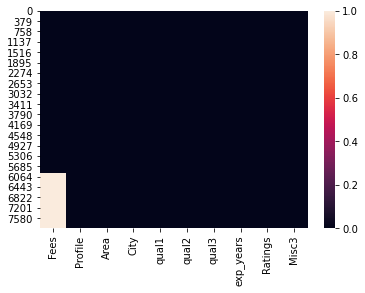

In [26]:
#Let's plot the heat map for null values

sns.heatmap(doc.isnull())
plt.show()

In [27]:
#Let's check the Data Types of our DataSet

doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fees       5961 non-null   float64
 1   Profile    7948 non-null   object 
 2   Area       7948 non-null   object 
 3   City       7948 non-null   object 
 4   qual1      7948 non-null   object 
 5   qual2      7948 non-null   object 
 6   qual3      7948 non-null   object 
 7   exp_years  7948 non-null   int32  
 8   Ratings    7948 non-null   int32  
 9   Misc3      7948 non-null   int32  
dtypes: float64(1), int32(3), object(6)
memory usage: 527.9+ KB


### Observation:
    
    1- We have 7948 rows and 10 columns in our concatinated
       data set
    
    2- After data preprocessing and cleaning we have
       two dtypes in our data i.e. flaot and int
        
    3- we have successfully imputed all the missing values
       and we do not have any missing values in out dataset
       except the fees column where we have predict those values

In [28]:
#Let's check the fees Distribution

doc.Fees.value_counts().reset_index().sort_values(by='index')

,index,Fees
27,5.0,1
25,10.0,2
28,20.0,1
20,30.0,4
23,40.0,2
11,50.0,81
19,60.0,11
16,70.0,18
18,80.0,12
0,100.0,1306


### we can observe that the minimum fees is 5 and maximum fees is 950 Rs

In [29]:
doc[doc.Fees < 50]

,Fees,Profile,Area,City,qual1,qual2,qual3,exp_years,Ratings,Misc3
5951,40.0,Ayurveda,Bandra East,Mumbai,BAMS,XXX,XXX,37,0,0
5952,40.0,Homeopath,Kandivali West,Mumbai,BHMS,Certificate in Child Health (CCH),CGO,22,0,0
5953,30.0,Ayurveda,Marathahalli,Bangalore,MD - Ayurveda Medicine,XXX,XXX,35,0,0
5954,30.0,Ayurveda,Goregaon East,Mumbai,BAMS,XXX,XXX,9,0,0
5955,30.0,Ayurveda,Secunderabad,Hyderabad,BAMS,XXX,XXX,15,0,0
5956,30.0,Ayurveda,Bhandup West,Mumbai,BAMS,XXX,XXX,45,0,0
5957,20.0,General Medicine,Secunderabad,Hyderabad,MBBS,MD - General Medicine,XXX,44,0,0
5958,10.0,Ayurveda,Worli,Mumbai,BAMS,XXX,XXX,4,0,0
5959,10.0,Dentist,Perumbavoor,Ernakulam,BDS,XXX,XXX,3,0,0
5960,5.0,Dentist,TV Medical College,Thiruvananthapuram,BDS,XXX,XXX,6,0,0


#### We can be observe that there are few records where years of experience is much greater than 10 or 20 but the Fees is less than 50. However there are some of the records which have less than 1 years of experience and even then the fees is more than 50. We cannot deny the fact that different qualification and profile demands/required different fees. So we can say that either they have data migration error or they are charity cases

### Now our data is cleaned and ready for EDA

## Exploratory Data Analysis

In [30]:
#Let's check the statistic Matrix

doc.describe().T

,count,mean,std,min,25%,50%,75%,max
Fees,5961.0,307.944640,190.920373,5.0,150.0,300.0,500.0,950.0
exp_years,7948.0,17.446653,11.201217,0.0,9.0,15.0,23.0,66.0
Ratings,7948.0,42.321465,47.324081,0.0,0.0,0.0,96.0,100.0
Misc3,7948.0,10.324987,39.854939,0.0,0.0,0.0,1.0,854.0


### Observations:
    
    1- From the count we can confirm that we do not have any missing
       values in our dataset, except the fees values which we have to
       predict
        
    2- Mean is greater than median in all the columns which
       indicates our data is positively skewed
        
    3- After observing the 75% and 100% percentile we can clearly
       say that there are outliers in our dataset
        
    4- Standard Deviation for Fees column is very high which means
       the data is spread throught and is not clustered around the
       mean
        
    5- We can also observe that minimum Fees is 5 which is not
       not practically possible so it mean that there is a typo
       error or data migration error or may be a case of charity

In [31]:
#Let's check the correlation

doc.corr().style.background_gradient(cmap='coolwarm')

,Fees,exp_years,Ratings,Misc3
Fees,1.000000,0.002117,0.153273,0.089585
exp_years,0.002117,1.000000,-0.033530,0.011948
Ratings,0.153273,-0.033530,1.000000,0.293172
Misc3,0.089585,0.011948,0.293172,1.000000


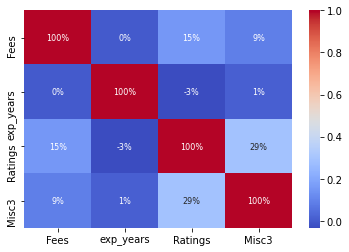

In [32]:
#Let's plot the heat map for the correlation matrix

sns.heatmap(doc.corr(),annot=True,cmap='coolwarm',annot_kws={"size":8},fmt='0.0%');

### Observations:
    
    1- Since most of our columns are catagorical variables so
       we do not have many correlations between features
        
    2- Fees, Misc3, ratings have moderate positively
       correlation
    
    3- Exp_year and  Rating have very low negative correlation with
       each other.

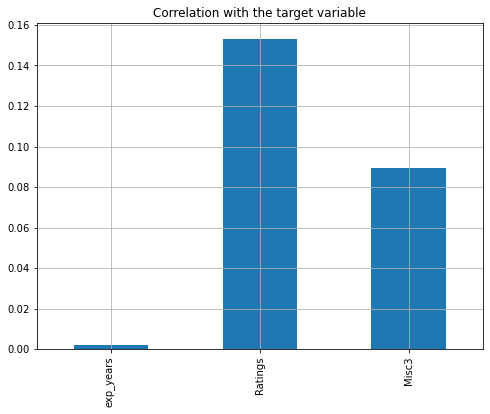

In [33]:
#Let's check the correlation with our target variable

plt.figure(figsize=(8,6))
doc.drop('Fees',axis=1).corrwith(doc['Fees']).plot(kind='bar',grid=True)
plt.title("Correlation with the target variable");

#### We can observe that Ratings have the highest correlation with our target variable i.e. fees

## Data Visualiation

### Univariate Analysis

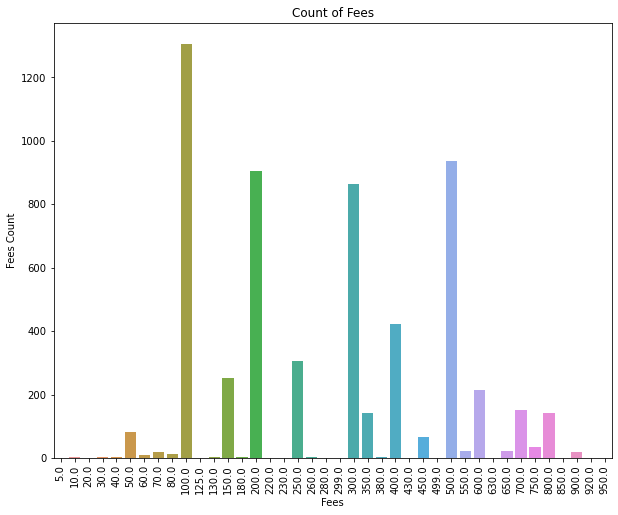

100.0    1306
500.0     938
200.0     904
300.0     864
400.0     424
250.0     307
150.0     253
600.0     215
700.0     153
350.0     143
800.0     143
50.0       81
450.0      65
750.0      34
550.0      22
650.0      21
70.0       18
900.0      18
80.0       12
60.0       11
30.0        4
380.0       2
130.0       2
40.0        2
180.0       2
10.0        2
260.0       2
5.0         1
20.0        1
499.0       1
299.0       1
230.0       1
850.0       1
430.0       1
220.0       1
630.0       1
950.0       1
280.0       1
125.0       1
920.0       1
Name: Fees, dtype: int64


In [34]:
plt.subplots(figsize=(10,8))
sns.countplot(x='Fees',data=doc)
plt.title("Count of Fees")
plt.xlabel("Fees")
plt.ylabel("Fees Count")
plt.xticks(rotation=90)
plt.show()
print(doc['Fees'].value_counts())

#### We can observe that the 100 Rs is the most common doctor consulation fees, followed by 200, 500, 300 and so on.

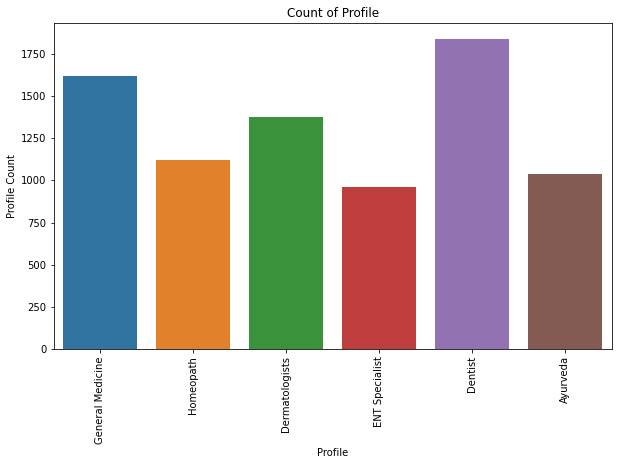

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64


In [35]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Profile',data=doc)
plt.title("Count of Profile")
plt.xlabel("Profile")
plt.ylabel("Profile Count")
plt.xticks(rotation=90)
plt.show()
print(doc['Profile'].value_counts())

#### We can observe dentist are the most visited doctor, followed by General Medicine, Dermaatologist, Homeopath etc

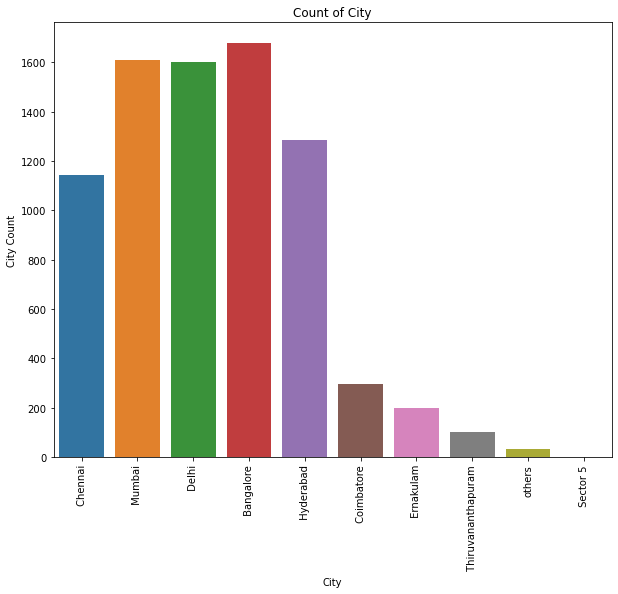

 Bangalore             1678
 Mumbai                1608
 Delhi                 1601
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
others                   32
 Sector 5                 1
Name: City, dtype: int64


In [36]:
plt.subplots(figsize=(10,8))
sns.countplot(x='City',data=doc)
plt.title("Count of City")
plt.xlabel("City")
plt.ylabel("City Count")
plt.xticks(rotation=90)
plt.show()
print(doc['City'].value_counts())

#### We can observe most of the doctors are from Merto city i.e. Banglore, Mumbai, Delhi and Hyderabad

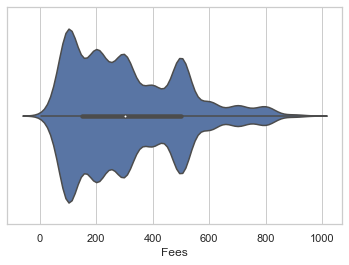

In [37]:
sns.set(style='whitegrid')
sns.violinplot(doc['Fees'])
plt.show()

We can observe that fees median is around 300 and tip od the plot indicaes that there are outlier 

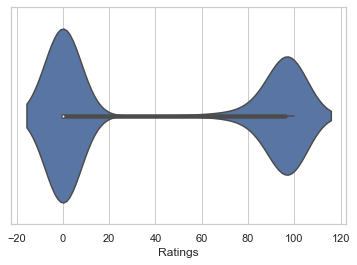

In [38]:
sns.set(style='whitegrid')
sns.violinplot(doc['Ratings'])
plt.show()

We can observe that median is at 0 and data is not clustered around the mean. There are hardly any consultation fees from 20 to 80 Rs

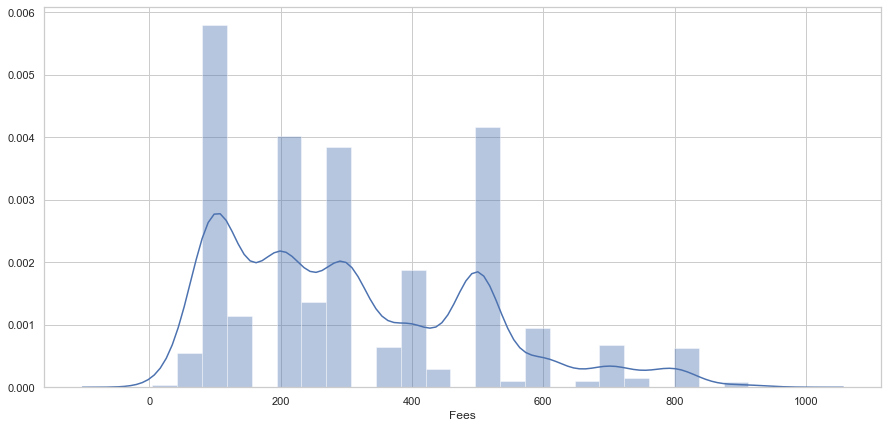

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(doc['Fees'].sort_values(), ax=ax)
plt.show()

We can observe that mode consultation fees is Rs 100 then Rs 500

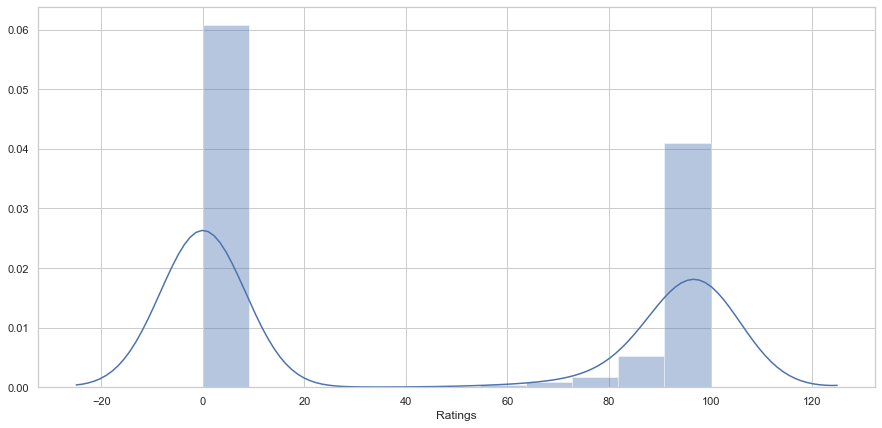

In [40]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(doc['Ratings'].sort_values(), ax=ax)
plt.show()

We can observe that mode rating is 0 to 10 and followed by 90 to 100

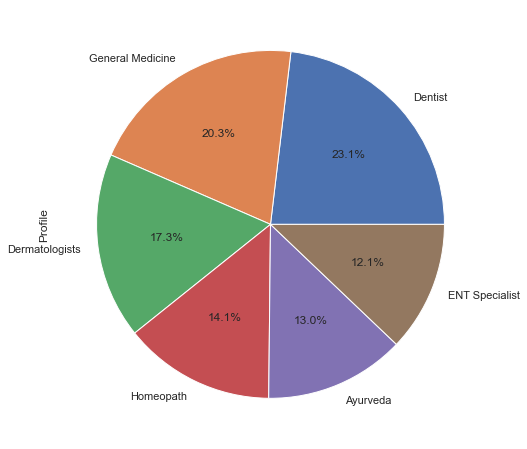

In [41]:
doc['Profile'].value_counts().plot.pie(figsize = (8,8), autopct = '%.1f%%');

We can observe the percentage of doctors speciality in the above graph

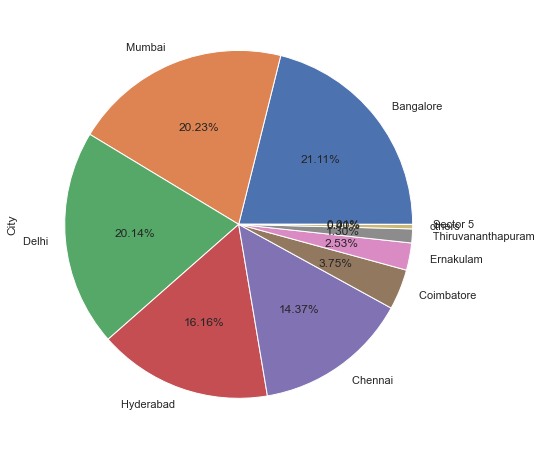

In [42]:
#Nominal variable representation using pie chart

doc['City'].value_counts().plot.pie(figsize = (8,8), autopct = '%.2f%%');

We can observe that maximum number of doctors are from metro city

## Bivariant Analysis

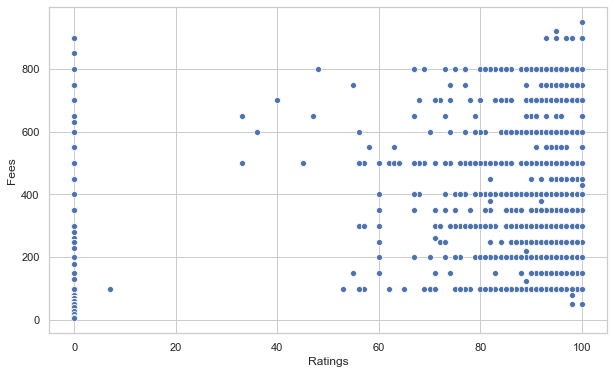

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Fees',x='Ratings',data=doc)
plt.show()

We can observe from the above graph that maximum mode of rating is 0 and fees is 100

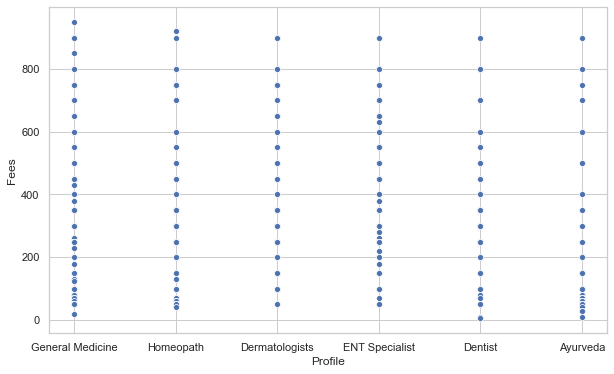

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Fees',x='Profile',data=doc)
plt.show()

We can observe that General Medicine has the highest consulation fees

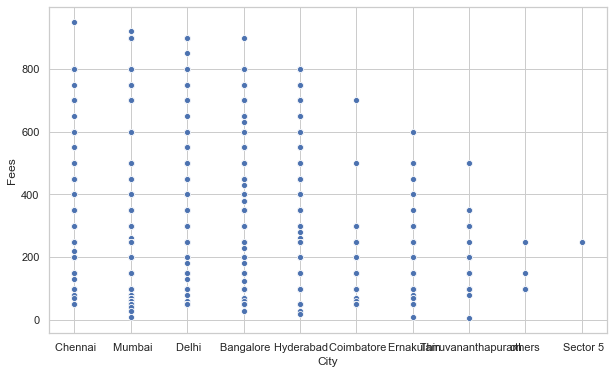

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Fees',x='City',data=doc)
plt.show()

We can observe that in chenna the consulation fees is highest, followed by Mumbai, delhi and banglore

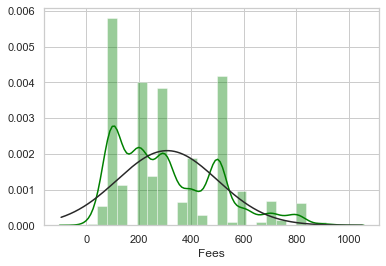

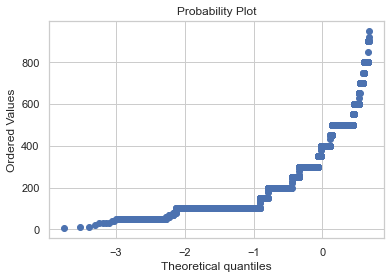

In [46]:
from scipy import stats
from scipy.stats import norm
sns.distplot(doc['Fees'], fit = norm, color = 'Green')
fig= plt.figure()
res = stats.probplot(doc['Fees'], plot = plt)

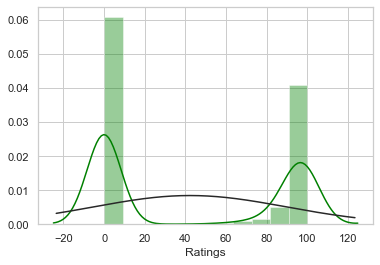

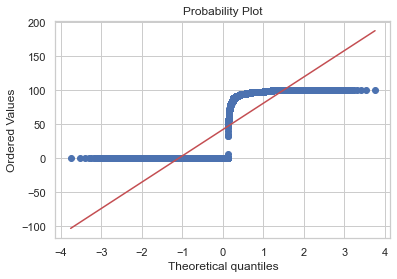

In [47]:
from scipy import stats
from scipy.stats import norm
sns.distplot(doc['Ratings'], fit = norm, color = 'Green')
fig= plt.figure()
res = stats.probplot(doc['Ratings'], plot = plt)

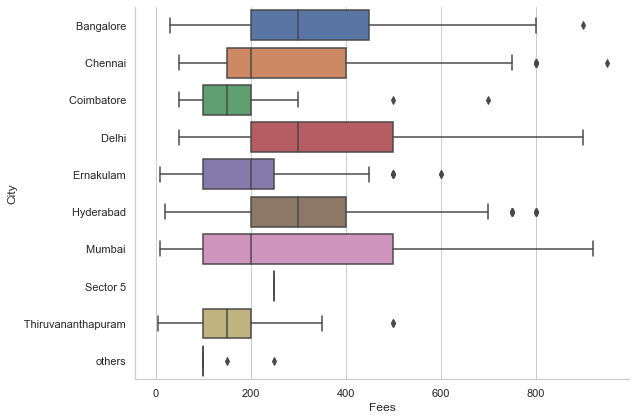

In [48]:
sns.catplot(x='Fees', y='City', data=doc.sort_values("City"), kind='box', height=6, aspect= 1.5)
plt.show()

We can observe that median for all the city varies and there are outliers present. Mumbai, Delhi, Chennai data is positively skewed where as Ernakulam data is negatively skewed

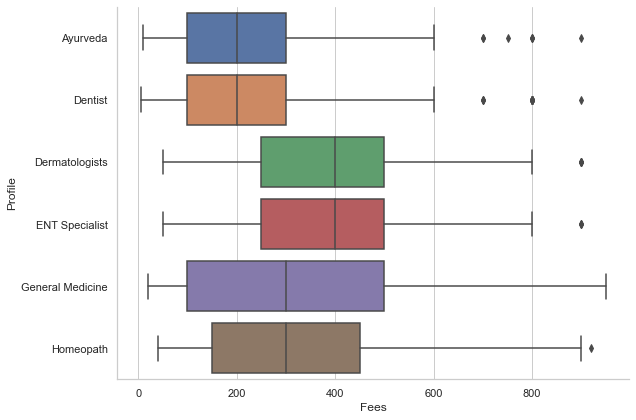

In [49]:
sns.catplot(x='Fees', y='Profile', data=doc.sort_values("Profile"), kind='box', height=6, aspect= 1.5)
plt.show()

We can observe that there are outliers and most of the data normally distributed. Dermatologist and ENT specialist data is slightly negatively skewed

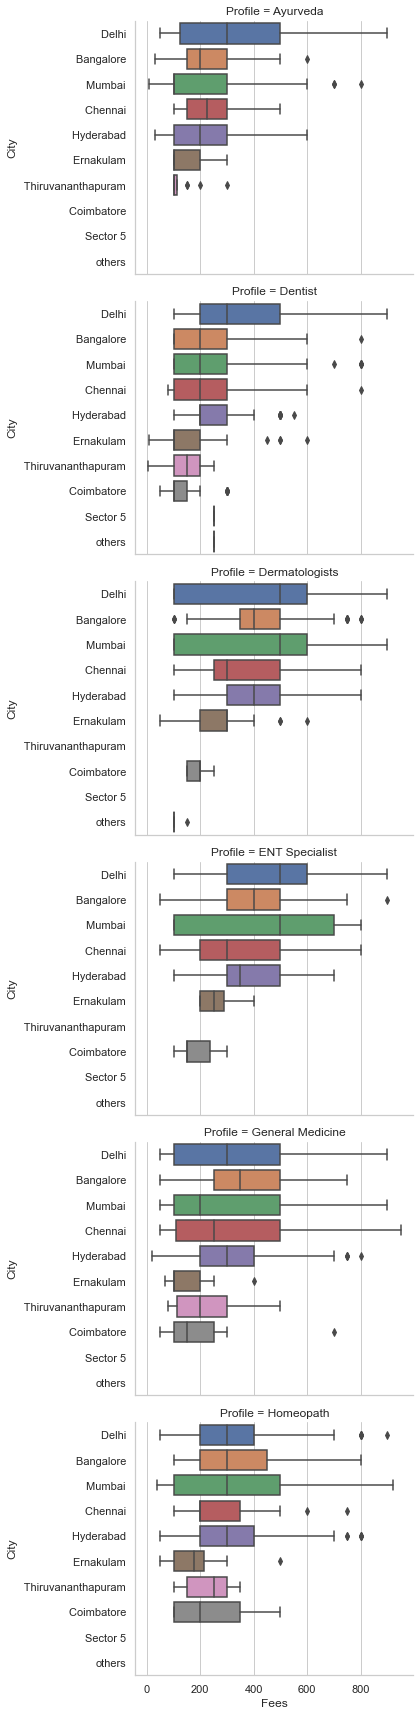

In [50]:
sns.catplot(x='Fees', y='City', row='Profile', data=doc.sort_values("Profile"), kind='box', height=4, aspect= 1.5)
plt.show()

### Observation:
    
    1- We can observe that most of the doctor are from metro cities
    
    2- Ayurved and Dentist speciality is mostly evenly distribited in all the cities
    
    3- Dermatologist and ENT are negatively skewed in the the metro cities
    
    4- General medicine is positively skewed in Mumbai and chennai

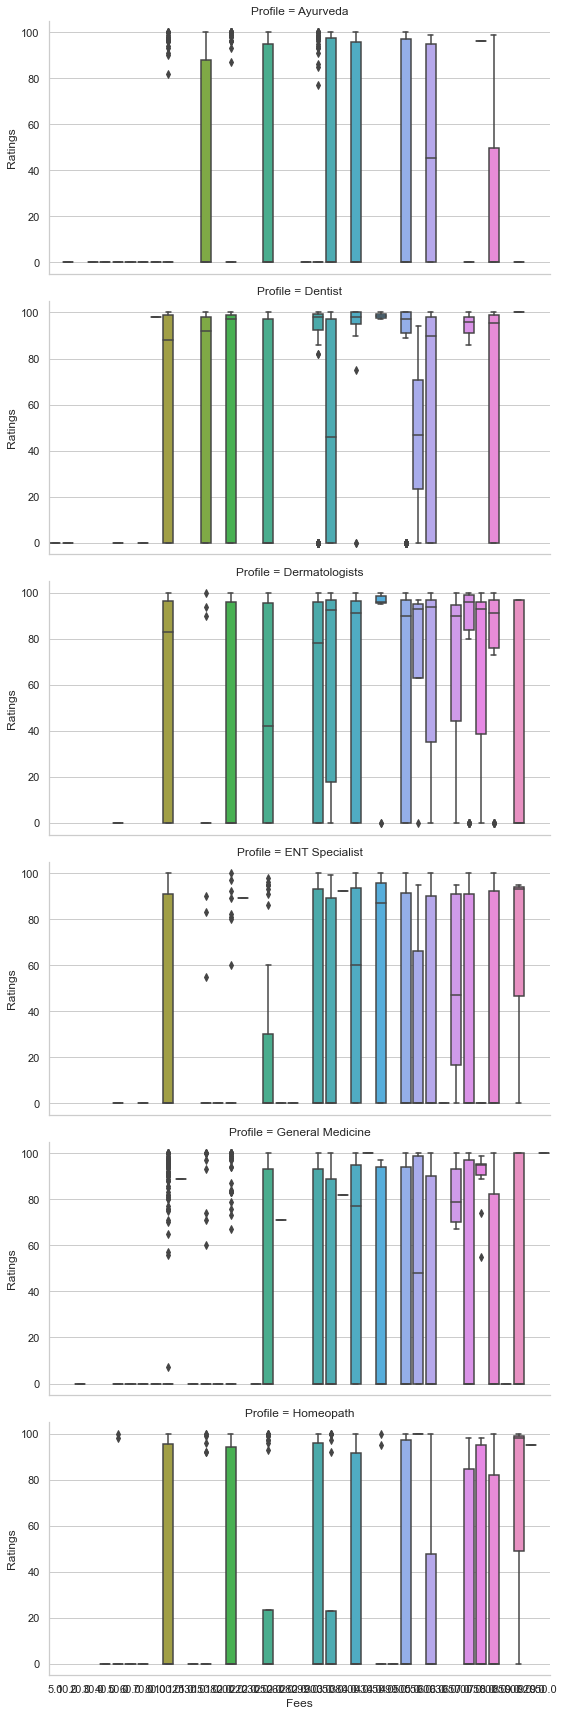

In [51]:
sns.catplot(x='Fees', y='Ratings', row='Profile', data=doc.sort_values("Profile"), kind='box', height=4, aspect= 2)
plt.show()

We can observe that there are not any certain pattern which can correlate the ratings and fees. It is may be because we have huge number of outliers in the rating columns

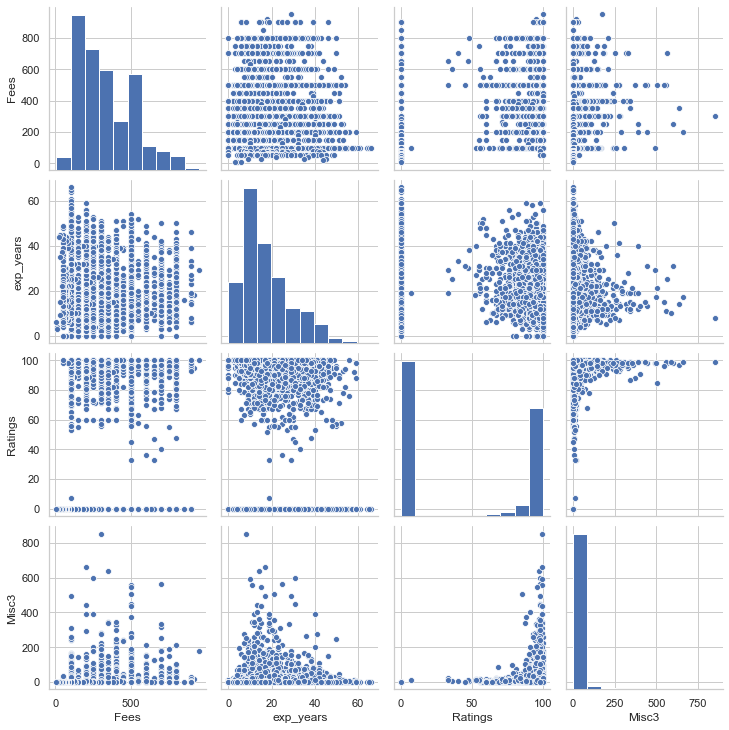

In [52]:
sns.pairplot(doc)
plt.show()

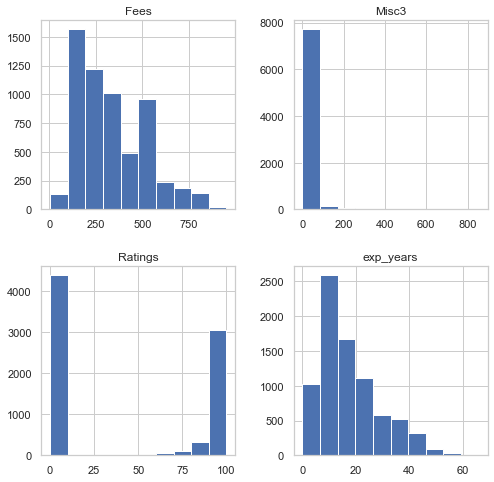

In [53]:
#Let's plot the histogram

doc.hist(figsize=(8,8));

We can observe that we do not have any normal distribution in our dataset. They are mostly positively skewed

### Plotting Outlier

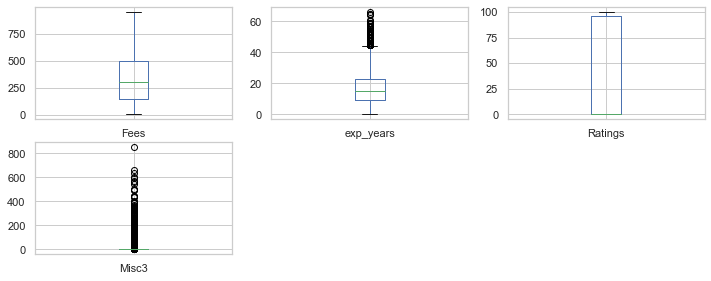

In [54]:
#Let's check the outliers

doc.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

We can observe that we have outliers in the Misc3 and Exp_years

In [55]:
# Let's Encode our Categorical variables in all the columns

from sklearn.preprocessing import LabelEncoder
cat_cols=['Profile','Area','City','qual1','qual2','qual3']
for i in cat_cols:
    l=LabelEncoder()
    doc[i]=l.fit_transform(doc[i])
doc.head()

,Fees,Profile,Area,City,qual1,qual2,qual3,exp_years,Ratings,Misc3
0,950.0,4,8,1,101,296,218,29,100,175
1,920.0,5,154,6,113,13,481,18,95,17
2,900.0,4,189,3,101,378,481,31,0,0
3,900.0,2,660,6,38,112,309,23,0,0
4,900.0,2,878,3,101,84,77,15,97,1


In [56]:
#Let's remove the the outliers

#from scipy.stats import zscore
#z_score=abs(zscore(doc))
#print(doc.shape)
#doc_final=doc.loc[(z_score<3).all(axis=1)]
#print(doc_final.shape)

### While removing the outlier it is removing more data which is not good for our analysis. So, we have decided not to remove the outlier

In [57]:
#Let's check the skewness of our DataSet

doc.skew()

Fees         0.751870
Profile      0.088789
Area         0.100890
City         0.075867
qual1       -0.000762
qual2       -0.580769
qual3       -2.200929
exp_years    0.984224
Ratings      0.241674
Misc3        8.433681
dtype: float64

In [58]:
# Let's treat the skewness
#for col in doc.columns:
 #   if doc[col].skew()>0.55:
  #      doc[col]=np.log1p(doc[col])

In [59]:
#Let's recheck the skewness of our DataSet

#doc.skew()

### We tried to remove the skewness from our dataset and it has effected our result so we have decided not to treat the skewness

### Now our data is clean and ready for Modelling

## Model Preprationa and Modelling

In [60]:
#Let's assign the data libraries

train_doc = doc[0:5961]
test_doc = doc[5961:]
test_doc = test_doc.drop(['Fees'], axis =1)

In [61]:
# Let's split the data into dependent and independent variables

doct = train_doc[['qual1','qual2','exp_years', 'Ratings','Profile','Area','City','Misc3','Fees']]
X = doct.drop(['Fees'], axis=1)
y = doct.Fees

In [62]:
#Lets import all the metrics and regressors

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from xgboost.sklearn import XGBRegressor

In [63]:
maX_r2_score=0
for r_state in range(42,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>maX_r2_score:
        maX_r2_score = r2_scr
        final_r_state = r_state
    
print("maX R2 score corresponding to random state",final_r_state,"is",maX_r2_score)

maX R2 score corresponding to random state 152 is 0.13414860492152636


### We are getting maximum R2 score at random state 152. Since most of our data is catagorical and we do not have float dtypes in our target variable. So we are getting very low R2 score i.e. only 13%

In [64]:
#Let's split the data for testing and training

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=152)

In [65]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()
XGB = XGBRegressor()

In [66]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=188, shuffle=True)

In [68]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
RMAE = []

for name,model in models:
    
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error: {}".format(mse))
    MSE.append(mse)
    
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error: {}".format(mae))
    MAE.append(mae)
    
    rmae = np.sqrt(mean_absolute_error(y_test,pre))
    print("Root Mean absolute error: {}".format(rmae))
    RMAE.append(rmae)
    
    print("***************************************************\n")

LinearRegression()
R2 Score =  0.11883293385925942
Cross val score =  0.09852679953444424
Mean Squared error: 32503.844615099028
Mean absolute error: 146.59585382632233
Root Mean absolute error: 12.107677474492055
***************************************************

Ridge()
R2 Score =  0.11883322244032557
Cross val score =  0.09852685833564867
Mean Squared error: 32503.833970132262
Mean absolute error: 146.59586812433213
Root Mean absolute error: 12.107678064944249
***************************************************

Lasso()
R2 Score =  0.11871806960700826
Cross val score =  0.098514388710598
Mean Squared error: 32508.081643411213
Mean absolute error: 146.62229343815065
Root Mean absolute error: 12.10876927842589
***************************************************

KNeighborsRegressor()
R2 Score =  0.06149222584201164
Cross val score =  0.008617402558189857
Mean Squared error: 34618.98660704304
Mean absolute error: 145.7480156512018
Root Mean absolute error: 12.0726142840398
**********

In [69]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE, "Root Mean Absolute Error": RMAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error,Root Mean Absolute Error
0,LinearRegression,0.118833,0.098527,32503.844615,146.595854,12.107677
1,Ridge,0.118833,0.098527,32503.833970,146.595868,12.107678
2,Lasso,0.118718,0.098514,32508.081643,146.622293,12.108769
3,KNeighborsRegressor,0.061492,0.008617,34618.986607,145.748016,12.072614
4,SVR,0.007051,0.008396,36627.167992,150.318787,12.260456
5,DecisionTreeRegressor,-0.581202,-0.586664,58326.216881,174.896590,13.224847
6,RandomForestRegressor,0.182981,0.179116,30137.592440,134.203841,11.584638
7,AdaBoostRegressor,0.119660,0.104273,32473.339018,149.254738,12.216986
8,GradientBoostingRegressor,0.237941,0.213900,28110.280847,132.015814,11.489813
9,XGBoostRegressor,0.196320,0.176824,29645.573645,130.157076,11.408640


### From the above pivot table we can observe that we are not getting the very good score from any of the regression model. Let try to hyper tune our model and check the score again

In [70]:
#Let's look at parameters used by our current GradientBoost

GBC = GradientBoostingRegressor(random_state=152)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(GBC.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 152,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth':[3,5,8],
    'n_estimators':[100,200,500,1000],
             }
grid = GridSearchCV(estimator=GBC,param_grid=parameters,cv=2,
                    n_jobs=5,verbose=True)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.9s
[Parallel(n_jobs=5)]: Done 168 out of 168 | elapsed:  2.4min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=152),
             n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=True)
0.19072997231680883
200
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [72]:
#Let's retrain the regressor model with the best parameters

GBC = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 3, n_estimators = 200)
GBC.fit(X_train,y_train)
print("Score=",GBC.score(X_train,y_train))
predgbc = GBC.predict(X_test)
print('*******************************************************************')
print('Mean Absolute Error= ', mean_absolute_error(y_test,predgbc))
print('Mean squared Error= ', mean_squared_error(y_test,predgbc))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predgbc)))
print('*******************************************************************')
print('R2 Score=',r2_score(y_test,predgbc))    

Score= 0.2763999869417013
*******************************************************************
Mean Absolute Error=  132.26958964312936
Mean squared Error=  28077.840273001442
Root Mean Absolute Error=  11.500851692076086
*******************************************************************
R2 Score= 0.23882025557567632


In [73]:
predgbc

array([251.99472011, 232.09494363, 221.50062499, ..., 325.12522424,
       261.3668516 , 336.61310814])

### As we can see our model is predicting the resule. Let's check it in the test dataset and see how our model is predicting the result on the test dataset

In [74]:
#Let's check the predicted result on the raw test file and see how's oor model is performing on the raw data

doc_test_final = pd.read_excel("C:/Users/Shubhham/Downloads/Data Trained/Doctor's consultant fees/Final Participant Data Folder/Final_Test.xlsx")

doc_ID = doc_test_final[['Profile']]

doc_test_final = pd.concat([doc_ID, pd.DataFrame(predgbc).rename(columns = {0 : 'Fees'})], axis=1)

doc_test_final

,Profile,Fees
0,General Medicine,251.994720
1,ENT Specialist,232.094944
2,Dermatologists,221.500625
3,Ayurveda,299.495665
4,Dentist,286.728355
...,...,...
1982,Ayurveda,NaN
1983,Dermatologists,NaN
1984,General Medicine,NaN
1985,Dentist,NaN


### We can observe that our model is not performing we as there are still null values which our model is not predicting in the test dataset.


## So we are going to use another model and again try predicting the result on the test dataset

In [75]:
# Let's import the required libraries

import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, n_estimators = 100)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[20:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [77]:
R2 = r2_score(y_test,preds)
sc = cross_val_score(xg_reg,X,y,cv=kf,scoring="r2").mean()
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('\n')
print("R2 Score:",R2)
print("Cross val score:",sc)
print("Root Mean absolute error: %f" % (rmse))
test_xgb = test_doc[['qual1','qual2','exp_years', 'Ratings','Profile','Area','City','Misc3']]
preds_xgb = xg_reg.predict(test_xgb)
test_xgb['Fees'] = preds_xgb

[20:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


R2 Score: 0.21398619581024714
Cross val score: 0.2179762049705704
Root Mean absolute error: 173.812509


#### Our RMSE score is around 173

In [78]:
preds_xgb

array([272.68283, 339.61295, 364.71463, ..., 299.95834, 207.39716,
       330.58963], dtype=float32)

### We can clearly observe that our model is performing excellent and predicting the results

In [79]:
#Let's check the predicted result on the raw test file and see how's our model is performing on the raw data

doc_test_final = pd.read_excel("C:/Users/Shubhham/Downloads/Data Trained/Doctor's consultant fees/Final Participant Data Folder/Final_Test.xlsx")

doc_ID = doc_test_final[['Profile']]

doc_test_final = pd.concat([doc_ID, pd.DataFrame(preds_xgb).rename(columns = {0 : 'Fees'})], axis=1)

doc_test_final

,Profile,Fees
0,General Medicine,272.682831
1,ENT Specialist,339.612946
2,Dermatologists,364.714630
3,Ayurveda,234.716309
4,Dentist,281.951996
...,...,...
1982,Ayurveda,233.142166
1983,Dermatologists,368.525726
1984,General Medicine,299.958344
1985,Dentist,207.397156


## We can clearly observe that the Model is performing excellent and is predicting the Doctor's consultation fees on our test dataset. So we will save this model and export the result in the csv file


In [80]:
#Let's save the model

import joblib

#save the model as a pickle in a file
joblib.dump(xg_reg,'doctor_fees.pkl')

['doctor_fees.pkl']

In [81]:
#Let's save the predicted resulat in a csv file

test_xgb.to_csv('Doc_predicted_result.csv')